# Choosing the policy portfolio

- How do we define the optimal mix of PSP and LHP for a given investor?
- Should be a function of $\gamma$, your risk aversion
  - But $\gamma$ is not observable.
  - Think of $\gamma$ as a *free parameter*
- common risk indicators in ALM:
  - volatility of the funding ratio (FR)
  - max drawdown of the FR
  - probability of a shortfall next year
- Generally: Increase the allocation to the PSP until the risk budget is exhausted
  - Risk budgets are set by stakeholders or agents acting on their behalf
  
### Conflicts

- Conflict between long-term perspectives (you need an upside) and short-term perspectives/constraints/risk budgets (vol. of the FR)
- Can also think of it as a conflict between dollar and risk budgets
  - Tight risk budget implies you can't generate too much upside. You'll then need a higher dollar budget, i.e. higher contribution levels to achieve the target levels of liability payments


### Solving the dilemma

- When you can't reach your future liabilities, you can cheat:
    - Use a higher discount rate
    - Use higher risk premia
- Or do it right:
    - Request a **higher dollar budget**, i.e. additional contributions, because you're not allowed to take on much risk
    - Request a **higher risk budget**, to be able to invest more aggressively
    - Improve the performance-seeking portfolio (PSP)

Example (from exercise): 

At a meeting of the board of trustees of a pension fund, it is decided that the acceptable volatility of the funding ratio is increased from 8% to 10. Increasing the risk budget allows investors to take on more risk. 

### Summary

The allocation between safe and risky is a function of the investor's dollar budget and risk budget

# Lab Session - Monte Carlo simulation of coupon-bearing bonds using CIR

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Simulation of prices of coupon-bearing bonds using CIR

In [2]:
erk.bond_price(
    maturity=5,
    principal=100,
    coupon_rate=0.05,
    coupons_per_year=12,
    discount_rate=0.03
)

0    109.275393
dtype: float64

With `cir()` we simulate the movement of interest rates:

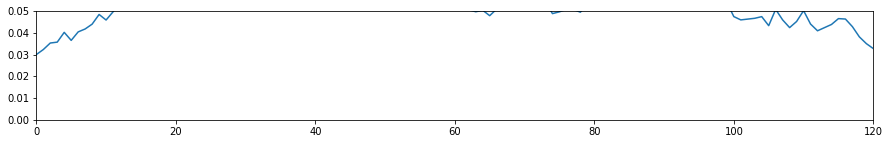

In [3]:
rates, zc_prices = erk.cir(
    n_years=10,
    n_scenarios=500,
    a=0.05,
    b=0.03,
    sigma=0.05,
    steps_per_year=12,
    r_0=0.03,
)

rates.iloc[:, 0].plot(figsize=(15,2), ylim=(0,0.05))

Now let's look at the bond price moving as these interest rates move. At $t=0$, all scenarios start out with the same bond price, since the discount rate is 0.03 everywhere then:

In [4]:
rates.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.032304,0.029072,0.024200,0.026286,0.028549,0.027662,0.032995,0.030274,0.034397,0.032363,...,0.026357,0.032187,0.029053,0.030048,0.028406,0.031734,0.029586,0.027856,0.029913,0.030418
2,0.035310,0.032353,0.022382,0.023913,0.032149,0.029306,0.029241,0.027542,0.036020,0.038815,...,0.023936,0.031820,0.033888,0.033443,0.028335,0.026502,0.033201,0.028095,0.029157,0.033138
3,0.035718,0.031947,0.028000,0.022503,0.032710,0.028464,0.028874,0.023596,0.034578,0.033692,...,0.017112,0.030088,0.036231,0.033760,0.026741,0.023785,0.035863,0.027522,0.030687,0.032058
4,0.040215,0.035736,0.031840,0.025345,0.033655,0.025597,0.030965,0.023709,0.031588,0.032364,...,0.019222,0.032395,0.037086,0.035175,0.025968,0.023797,0.035059,0.032230,0.028712,0.032501


In [5]:
t=0
erk.bond_price(5, 100, 0.05, 12, rates.iloc[t][[0,1,2]])

0    109.275393
1    109.275393
2    109.275393
dtype: float64

At $t=1$, they start to diverge:

In [6]:
t=1
erk.bond_price(5, 100, 0.05, 12, rates.iloc[t][[0,1,2]])

0    108.160491
1    109.728007
2    112.138372
dtype: float64

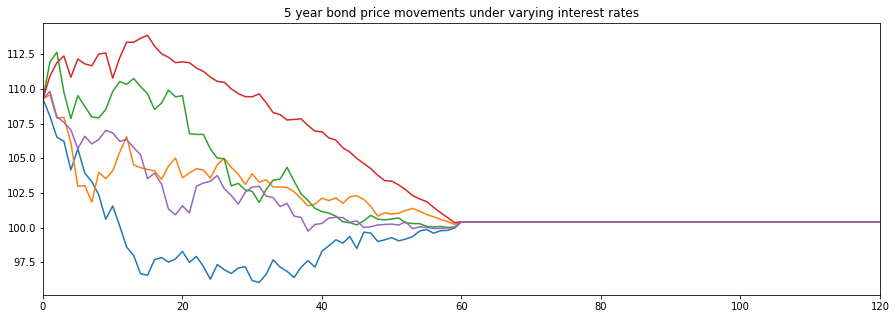

In [7]:
erk.bond_price(5, 100, 0.05, 12, rates[[0,1,2,3,4]]).plot(
    figsize=(15,5), legend=False, title="5 year bond price movements under varying interest rates"
)

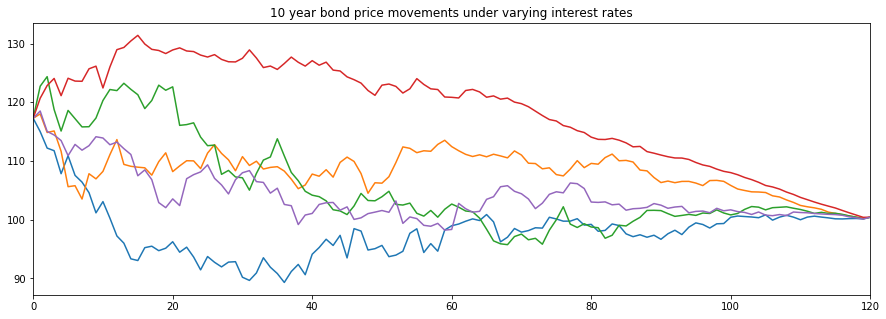

In [8]:
prices = erk.bond_price(10, 100, 0.05, 12, rates[[0,1,2,3,4]])

prices.plot(
    figsize=(15,5), legend=False, title="10 year bond price movements under varying interest rates"
)

**Note the convergence to the final value of 100 + 5/12 (i.e. the last payment)**

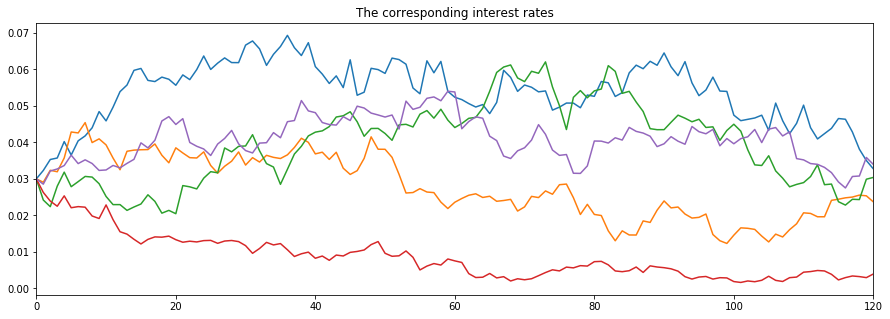

In [9]:
rates[[0,1,2,3,4]].plot(
    figsize=(15,5), legend=False, title="The corresponding interest rates"
)

In [10]:
# Monthly bond returns:
bond_returns = prices.pct_change().dropna()
br = bond_returns

erk.annualize_rets(br, 12)

0   -0.015387
1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
dtype: float64

**Note: These are *price* returns, not *total* returns**

In [11]:
p = erk.bond_price(
    maturity=10, principal=100, coupon_rate=0.05, coupons_per_year=12, discount_rate=rates[[0,1,2,3]]
)

p

,0,1,2,3
0,117.26,117.26,117.26,117.26
1,114.999,118.011,122.726,120.682
2,112.189,114.846,124.357,122.839
3,111.744,115.107,118.752,124.052
4,107.827,111.644,115.093,121.118
...,...,...,...,...
116,100.121,100.836,100.902,101.568
117,100.178,100.622,100.637,101.165
118,100.197,100.406,100.427,100.779
119,100.124,100.205,100.167,100.392


In [12]:
btr = erk.bond_total_return(
    monthly_prices=p,
    principal=100,
    coupon_rate=0.05,
    coupons_per_year=12,
)

btr

,0,1,2,3
1,-0.0157348,0.00995496,0.0501638,0.0327304
2,-0.0208044,-0.0232873,0.0166833,0.0213306
3,-0.000255472,0.00589807,-0.0417177,0.0132673
4,-0.0313275,-0.0264614,-0.0273068,-0.0202905
5,0.0321639,-0.0502786,0.0341553,0.0279369
...,...,...,...,...
116,0.00394364,0.00191029,0.00228362,-1.79979e-05
117,0.00472864,0.00201531,0.00150723,0.000134284
118,0.00435128,0.00199634,0.0020469,0.000310291
119,0.00343456,0.00214444,0.0015645,0.000291642


In [13]:
erk.annualize_rets(btr, 12)

0    0.036155
1    0.031160
2    0.032563
3    0.027256
dtype: float64

**So:** The bond pays a coupon of 0.05, the interest rates do a random walk around 3%, and the bond's **total return** is around 3%!

In [14]:
# Full simulation for 500 scenarios:
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_10[[0,1,2]].tail()

,0,1,2
116,100.121,100.836,100.902
117,100.178,100.622,100.637
118,100.197,100.406,100.427
119,100.124,100.205,100.167
120,100.417,100.417,100.417


By the end of the bond's lifetime, its value has converged to the final payment: 100 + 5/12

----

Let's look at the price of a **30 year bond** but **over 10 years** (since `rates` was only simulated for 10 years.

In [15]:
price_30 = erk.bond_price(30, 100, .05, 12, rates)
price_30[[0,1,2]].tail()

,0,1,2
116,104.817,140.204,144.193
117,109.679,139.669,140.863
118,116.684,138.512,140.889
119,121.562,138.756,130.315
120,125.287,141.868,129.348


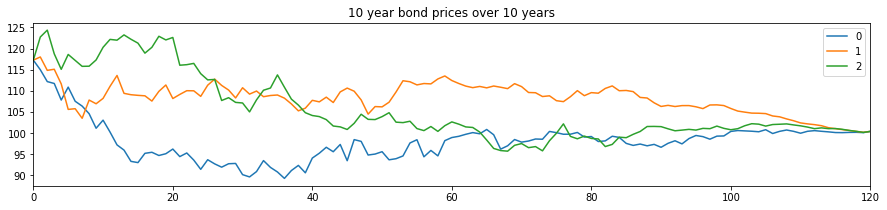

In [16]:
price_10[[0,1,2]].plot(title="10 year bond prices over 10 years", figsize=(15,3))

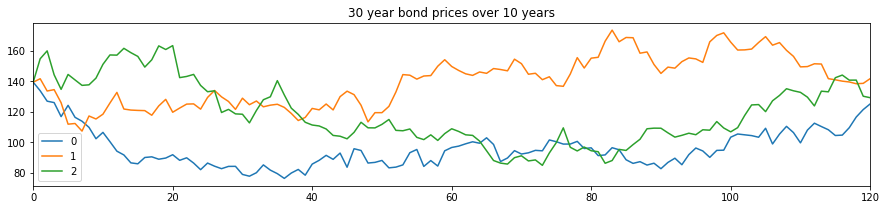

In [17]:
price_30[[0,1,2]].plot(title="30 year bond prices over 10 years", figsize=(15,3))

See: You don't want to use the long bonds to hedge, because you don't know their value 10 years from now.

In [18]:
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)

# a portfolio with a 60/40 mix of the 10/30-year bonds
rets_bonds = 0.6*rets_10 + 0.4*rets_30
# This formula is assuming we're rebalancing to 60/40 each month!

Compute the mean returns of bonds across all these 500 scenarios:

In [19]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds), riskfree_rate=0.03)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.034913,0.003287,-0.080738,2.219071,-0.001274,-0.001068,1.454869,0.0


- Next generate the prices and returns of a **stock** portfolio:

In [20]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [21]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

### Now construct a portfolio of 70/30 stocks+bonds mixed

### and measure the performance of a PSP and LHP mix:

In [22]:
rets = 0.7*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean), riskfree_rate=0.03)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.06126,0.00453,-0.320225,3.275484,-0.002717,-0.002008,6.716144,0.0


In [23]:
rets_mean

1      0.005114
2      0.005931
3      0.006249
4      0.005139
5      0.005422
         ...   
116    0.004583
117    0.005406
118    0.007173
119    0.005656
120    0.006202
Length: 120, dtype: float64

### Goal in next sessions: Find the optimal stock/bond allocation given a certain future liability stream

# Beyond LDI

- How to improve LDI solutions by improving *linkage* between the PSP and LHP
- PSPs job: "Efficiently harvesting risk premia" <- beautifully said
- The **interaction** between performance and hedging motives should play an important role
  - imagine comparing two similar PSPs, but one has better liability hedging abilities


### Decomposition of investor welfare

Investor happiness, the final distribution of the funding ratio:

$$IW = \underbrace{\frac{\lambda^2_{\text{PSP}}}{2\gamma}}_{\text{pure performance contribution}} + \underbrace{\frac{(1-\gamma)^2}{2\gamma}\sigma^2_L \rho^2_{L,\text{LHP}}}_{\text{pure hedging contribution}} + \underbrace{\left( 1-\frac{1}{\gamma} \right) \sigma_L \rho_{L,\text{PSP}}\lambda_{\text{PSP}}}_{\text{cross-contribution perf/hedg}} $$

- Component 1: related to the Sharpe ratio $\lambda$ of the PSP. Higher $\lambda$ is better
- Component 2: Correlation of the LHP with the liabilities. A higher correlation is better, because the LHP does a better job of hedging against the liabilities
- Component 3: Has to do with $\lambda_{\text{PSP}}$ **and** the correlation of the **PSP** with the liabilities

----

- So: You want your PSP to hedge against the liabilities too, **unless** the performance would suffer too much from it.
  - Because then, you can allocate more moniez towards the PSP!
  - The drawback/tradeoff is that as your PSP becomes more liability-friendly, it might generate a lower performance.

# Lab Session - Naive risk budgeting between the PSP and GHP

## The Simplest Allocator - Fixed Mix

The allocator's job is to come up with a time series of weights, so let's create the simplest possible allocator - one that puts a fixed fraction in the first portfolio and the remaining in the second

We are now ready to rerun the experiment we ran last time ... a bond portfolio of 60% in the 10 year bond and 40% in the 30 year bond to generate a fixed mix bond portfolio.

The new function `bt_mix` will backtest 

In [24]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0 = 0.03)
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_30 = erk.bond_price(30, 100, .05, 12, rates)
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator=erk.fixedmix_allocator, w1=.6)
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.03598,0.003496,0.47182,3.275283,-0.001442,-0.001151,1.664609,0.0


In [28]:
rets_bonds[0]  # first scenario of 60/40

1       0.0568104
2       0.0201594
3      -0.0178445
4      -0.0204097
5       0.0194618
          ...    
116     0.0145857
117     0.0069218
118    0.00272094
119     0.0209279
120    0.00322607
Name: 0, Length: 120, dtype: object

In [30]:
0.6*rets_10[0] + 0.4*rets_30[0]

1       0.0568104
2       0.0201594
3      -0.0178445
4      -0.0204097
5       0.0194618
          ...    
116     0.0145857
117     0.0069218
118    0.00272094
119     0.0209279
120    0.00322607
Name: 0, Length: 120, dtype: object

Now let's bring in stocks. We create some stock returns to use in a second:

In [31]:
price_eq = erk.gbm(n_years=10,n_scenarios=500,mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

And next, we'll use the mix backtester to build a 70-30 Stock-Bond mix. One way to assess the performance is, as before, to generate a composite and produce summary stats on the composite. We'll also examine a second approach, which is to compute summary stats on each scenario and average the summary stats.

In [32]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.060527,0.00454,0.07602,3.261635,-0.002799,-0.002103,6.544855,0.0


In [33]:
# Approach 2: compute stats on each scenario and then average
summaries = erk.summary_stats(rets_7030b)
summaries.mean()

Annualized Return          0.055038
Annualized Vol             0.107615
Skewness                   0.003508
Kurtosis                   2.965395
Cornish-Fisher VaR (5%)    0.045924
Historic CVaR (5%)         0.058221
Sharpe Ratio               0.226113
Max Drawdown              -0.206634
dtype: float64

However, both of these summaries are imperfect, since they aggregate across a wide distribution. In different situations one or the other might make sense, but for most individuals, the range of outcomes are what matters because we observe only one of the different possible scenarios.

Therefore, it make sense to example the range of possible outcomes and look at not just the average but also the less likely but possible outcomes.

## Distribution of Terminal Values and Measuring Risk Budget Efficiency

The basic idea is to measure the distribution of terminal values across all scenarios.

```python
def terminal_values(rets):
    """
    Computes the terminal values from a set of returns supplied as a T x N DataFrame
    Return a Series of length N indexed by the columns of rets
    """
    return (rets+1).prod()

def terminal_stats(rets, floor = 0.8, cap=np.inf, name="Stats"):
    """
    Produce Summary Statistics on the terminal values per invested dollar
    across a range of N scenarios
    rets is a T x N DataFrame of returns, where T is the time-step (we assume rets is sorted by time)
    Returns a 1 column DataFrame of Summary Stats indexed by the stat name 
    """
    terminal_wealth = (rets+1).prod()
    breach = terminal_wealth < floor
    reach = terminal_wealth >= cap
    p_breach = breach.mean() if breach.sum() > 0 else np.nan
    p_reach = breach.mean() if reach.sum() > 0 else np.nan
    e_short = (floor-terminal_wealth[breach]).mean() if breach.sum() > 0 else np.nan
    e_surplus = (cap-terminal_wealth[reach]).mean() if reach.sum() > 0 else np.nan
    sum_stats = pd.DataFrame.from_dict({
        "mean": terminal_wealth.mean(),
        "std" : terminal_wealth.std(),
        "p_breach": p_breach,
        "e_short":e_short,
        "p_reach": p_reach,
        "e_surplus": e_surplus
    }, orient="index", columns=[name])
    return sum_stats

```

In [34]:
pd.concat([erk.terminal_stats(rets_bonds, name="FI"), 
           erk.terminal_stats(rets_eq, name="Eq"),
           erk.terminal_stats(rets_7030b, name="70/30")],
          axis=1)

,FI,Eq,70/30
mean,1.385309,1.997377,1.798900
std,0.107517,1.036309,0.632897
p_breach,NaN,0.040000,0.008000
e_short,NaN,0.116132,0.062040
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


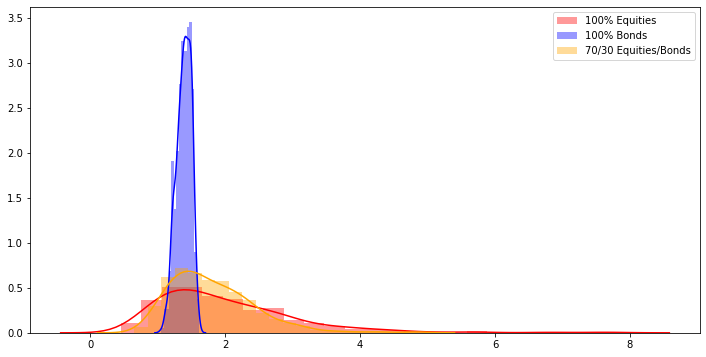

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.distplot(erk.terminal_values(rets_eq), color="red", label="100% Equities")
sns.distplot(erk.terminal_values(rets_bonds), color="blue", label="100% Bonds")
sns.distplot(erk.terminal_values(rets_7030b), color="orange", label="70/30 Equities/Bonds")
plt.legend();

Note how the higher mean return of the equities portfolio is due in part to the large upside spread in equities.

## Risk Budgeting through Glide Path Allocation

A potential improvement over naive fixed mix is to risk budget by making a simplistic assumption that risk = time.

In other words, if you have more time, increase the risk budget. If you have less time, derisk. This is the thinking behind a Target Date Fund.

Let's write an allocator that defines the weights as a glidepath sthat starts at a starting weight and then gradually decreases the weights to equities over time to an ending weight. For example, you can start at 80% stocks at the start of the 10 year period and then gradually move to 20% stocks by the end of the 10 year period.

Let's see how this does:

```python
def glidepath_allocator(r1, r2, start_glide=1, end_glide=0.0):
    """
    Allocates weights to r1 starting at start_glide and ends at end_glide
    by gradually moving from start_glide to end_glide over time
    """
    n_points = r1.shape[0]
    n_col = r1.shape[1]
    path = pd.Series(data=np.linspace(start_glide, end_glide, num=n_points))
    paths = pd.concat([path]*n_col, axis=1)
    paths.index = r1.index
    paths.columns = r1.columns
    return paths
```


In [37]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.glidepath_allocator, start_glide=.8, end_glide=.2)
pd.concat([erk.terminal_stats(rets_bonds, name="FI"), 
           erk.terminal_stats(rets_eq, name="Eq"),
           erk.terminal_stats(rets_7030b, name="70/30"),
           erk.terminal_stats(rets_g8020, name="Glide 80 to 20")],
          axis=1)

,FI,Eq,70/30,Glide 80 to 20
mean,1.385309,1.997377,1.798900,1.673838
std,0.107517,1.036309,0.632897,0.445550
p_breach,NaN,0.040000,0.008000,0.004000
e_short,NaN,0.116132,0.062040,0.072768
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


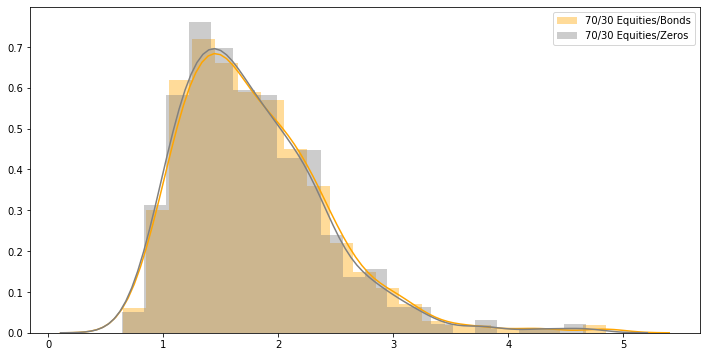

In [38]:
rets_7030z = erk.bt_mix(rets_eq, rets_zc, allocator=erk.fixedmix_allocator, w1=0.7)
plt.figure(figsize=(12, 6))
#sns.distplot(terminal_values(rets_eq), color="red", label="100% Equities")
#sns.distplot(terminal_values(rets_bonds), color="blue", label="100% Bonds")
sns.distplot(erk.terminal_values(rets_7030b), color="orange", label="70/30 Equities/Bonds")
#sns.distplot(terminal_values(rets_g8020), color="green", label="Glide 80 to 20")
sns.distplot(erk.terminal_values(rets_7030z), color="grey", label="70/30 Equities/Zeros")
plt.legend();

### Conclusion

Static or Naive risk budgeting involves allocating between the PSP and GHP using either a simple fixed mix or a blind glidepath. These can reduce the downside risk but come at the cost the expected return, and cannot be used to secure a minimum acceptable level of wealth or liabilities. In the next session, we'll examine dynamic approaches that will address the challenge of meeting a set of future liabilities such as replacement income, or a required level of wealth in the future.

----

# Liability-friendly equity portfolios

### Defining liability-friendliness

- Intuitive approach based on a cash-flow matching focus
  - Stocks with high + stable dividends are better to match liabilities
- Statistical approach based on a factor matching focus
  - Stocks with **low volatility** (because of e.g. lower dividend variability) are more bond-like and more attractive
  
You can define liability friendliness by the **tracking error** of a stock portfolio (e.g. S&P500) **w.r.t. a bond portfolio** (or a liability stream?). And low-volatility stocks have a lower (but of course still heavy) tracking error than a normal S&P500 portfolio.

**Conclusion**: Selecting stocks with high liability friendliness allows investors to allocate more to equity for a given risk budget. This translates into superior performance **unless** liability-friendly stocks strongly underperform the market average.

# Lab - Monte Carlo simulation of Dynamic Risk Budgeting between PSP and LHP

We've looked at the fundamental problem of how much to allocate in the safe asset vs the performance seeking asset, and we investigated static and glidepath based techniques. Now we'll look at modern dynamic techniques that are inspired by CPPI to ensure that the account value reaches a certain target minimum floor, but also maintains exposure to the upside through a dynamic risk budget

Let's start by building 500 scenarios for interest rates, an duration matched bond portfolio (proxied by a zero coupon bond) and a stock portfolio.

In [39]:
n_scenarios =  5000
rates, zc_prices = erk.cir(10, n_scenarios=n_scenarios, b=0.03, r_0 = 0.03, sigma=0.02)
price_eq = erk.gbm(n_years=10,n_scenarios=n_scenarios, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator=erk.fixedmix_allocator, w1=0.7)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75), 
           erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
           erk.terminal_stats(rets_7030b, name="70/30", floor=0.75)],
          axis=1).round(2)

,ZC,Eq,70/30
mean,1.34,1.96,1.75
std,0.00,0.97,0.59
p_breach,NaN,0.04,0.01
e_short,NaN,0.13,0.07
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


Let's write a new allocator that we'll call a Floor Allocator applies a dynamic risk budget to allocate more to the PSP when there is a cushion, similar to what we did for CPPI

```python
def floor_allocator(psp_r, ghp_r, floor, zc_prices, m=3):
    """
    Allocate between PSP and GHP with the goal to provide exposure to the upside
    of the PSP without going violating the floor.
    Uses a CPPI-style dynamic risk budgeting algorithm by investing a multiple
    of the cushion in the PSP
    Returns a DataFrame with the same shape as the psp/ghp representing the weights in the PSP
    """
    if zc_prices.shape != psp_r.shape:
        raise ValueError("PSP and ZC Prices must have the same shape")
    n_steps, n_scenarios = psp_r.shape
    account_value = np.repeat(1, n_scenarios)
    floor_value = np.repeat(1, n_scenarios)
    w_history = pd.DataFrame(index=psp_r.index, columns=psp_r.columns)
    for step in range(n_steps):
        floor_value = floor*zc_prices.iloc[step] ## PV of Floor assuming today's rates and flat YC
        cushion = (account_value - floor_value)/account_value
        psp_w = (m*cushion).clip(0, 1) # same as applying min and max
        ghp_w = 1-psp_w
        psp_alloc = account_value*psp_w
        ghp_alloc = account_value*ghp_w
        # recompute the new account value at the end of this step
        account_value = psp_alloc*(1+psp_r.iloc[step]) + ghp_alloc*(1+ghp_r.iloc[step])
        w_history.iloc[step] = psp_w
    return w_history
```


In [40]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=.75,  zc_prices=zc_prices[1:])
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75), 
           erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
           erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
           erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
          ],
          axis=1).round(2)

,ZC,Eq,70/30,Floor75
mean,1.34,1.96,1.75,1.93
std,0.00,0.97,0.59,0.98
p_breach,NaN,0.04,0.01,NaN
e_short,NaN,0.13,0.07,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [42]:
# The same, but with m=1,5,10 instead of the default 3:

rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=1)
rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=5)
rets_floor75m10 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=10)

pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75), 
           erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
           erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
           erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
           erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
           erk.terminal_stats(rets_floor75m10, name="Floor75m10", floor=0.75)
          ],
          axis=1).round(2)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5,Floor75m10
mean,1.34,1.96,1.75,1.93,1.62,1.94,1.95
std,0.00,0.97,0.59,0.98,0.43,0.98,0.98
p_breach,NaN,0.04,0.01,NaN,NaN,NaN,0.02
e_short,NaN,0.13,0.07,NaN,NaN,NaN,0.00
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


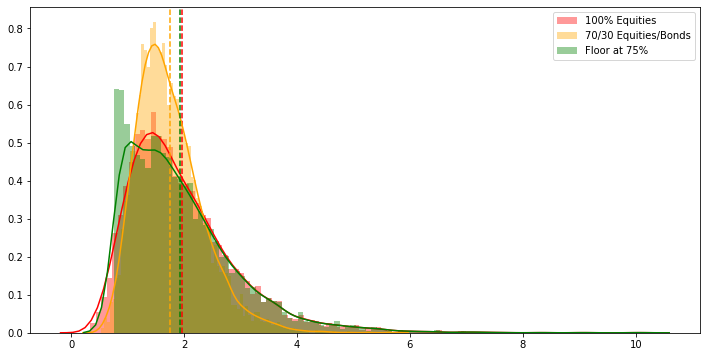

In [43]:
tv_eq = erk.terminal_values(rets_eq)
tv_zc = erk.terminal_values(rets_zc)
tv_7030b = erk.terminal_values(rets_7030b)
tv_floor75 = erk.terminal_values(rets_floor75)
tv_floor75m1 = erk.terminal_values(rets_floor75m1)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
plt.axvline(tv_eq.mean(), ls="--", color="red")
#sns.distplot(tv_zc, color="blue", label="100% Immunized Bonds")
#plt.axvline(tv_zc.mean(), ls="--", color="blue")
sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
plt.axvline(tv_7030b.mean(), ls="--", color="orange")
sns.distplot(tv_floor75, color="green", label="Floor at 75%", bins=100)
plt.axvline(tv_floor75.mean(), ls="--", color="green")

plt.legend()

## Dynamic Risk Budgeting with Drawdown instead of a fixed floor

```python
def drawdown_allocator(psp_r, ghp_r, maxdd, m=3):
    """
    Allocate between PSP and GHP with the goal to provide exposure to the upside
    of the PSP without going violating the floor.
    Uses a CPPI-style dynamic risk budgeting algorithm by investing a multiple
    of the cushion in the PSP
    Returns a DataFrame with the same shape as the psp/ghp representing the weights in the PSP
    """
    n_steps, n_scenarios = psp_r.shape
    account_value = np.repeat(1, n_scenarios)
    floor_value = np.repeat(1, n_scenarios)
    ### For MaxDD
    peak_value = np.repeat(1, n_scenarios)
    w_history = pd.DataFrame(index=psp_r.index, columns=psp_r.columns)
    for step in range(n_steps):
        ### For MaxDD
        floor_value = (1-maxdd)*peak_value ### Floor is based on Prev Peak
        cushion = (account_value - floor_value)/account_value
        psp_w = (m*cushion).clip(0, 1) # same as applying min and max
        ghp_w = 1-psp_w
        psp_alloc = account_value*psp_w
        ghp_alloc = account_value*ghp_w
        # recompute the new account value at the end of this step
        account_value = psp_alloc*(1+psp_r.iloc[step]) + ghp_alloc*(1+ghp_r.iloc[step])
        ### For MaxDD
        peak_value = np.maximum(peak_value, account_value) ### For MaxDD
        w_history.iloc[step] = psp_w
    return w_history
```

In [45]:
cashrate = 0.02
monthly_cashreturn = (1+cashrate)**(1/12) - 1
rets_cash = pd.DataFrame(data= monthly_cashreturn, index=rets_eq.index, columns=rets_eq.columns)
rets_maxdd25 = erk.bt_mix(rets_eq, rets_cash, allocator=erk.drawdown_allocator, maxdd=.25)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75), 
           erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
           erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
           erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
           erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
           erk.terminal_stats(rets_floor75m10, name="Floor75m10", floor=0.75),
           erk.terminal_stats(rets_maxdd25, name="MaxDD25", floor=0.75)           
          ],
          axis=1).round(2)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5,Floor75m10,MaxDD25
mean,1.34,1.96,1.75,1.93,1.62,1.94,1.95,1.62
std,0.00,0.97,0.59,0.98,0.43,0.98,0.98,0.53
p_breach,NaN,0.04,0.01,NaN,NaN,NaN,0.02,NaN
e_short,NaN,0.13,0.07,NaN,NaN,NaN,0.00,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].min()

-0.23534153902876034

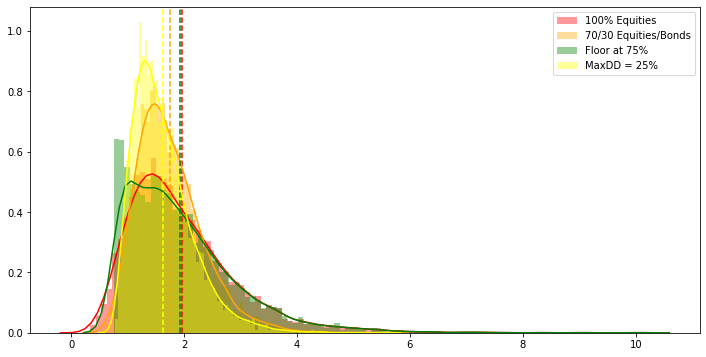

In [47]:
# Plot
plt.figure(figsize=(12, 6))
sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
plt.axvline(tv_eq.mean(), ls="--", color="red")
#sns.distplot(tv_zc, color="blue", label="100% Immunized Bonds")
#plt.axvline(tv_zc.mean(), ls="--", color="blue")
sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
plt.axvline(tv_7030b.mean(), ls="--", color="orange")
sns.distplot(tv_floor75, color="green", label="Floor at 75%", bins=100)
plt.axvline(tv_floor75.mean(), ls="--", color="green")
sns.distplot(tv_maxdd25, color="yellow", label="MaxDD = 25%", bins=100)
plt.axvline(tv_maxdd25.mean(), ls="--", color="yellow")
plt.legend()

## Backtesting Dynamic Strategies with Historical Data

Try and work with real historic data such as a the Industry Portfolios or the Total Market Index we constructed and run back tests with different parameter values. For instance:

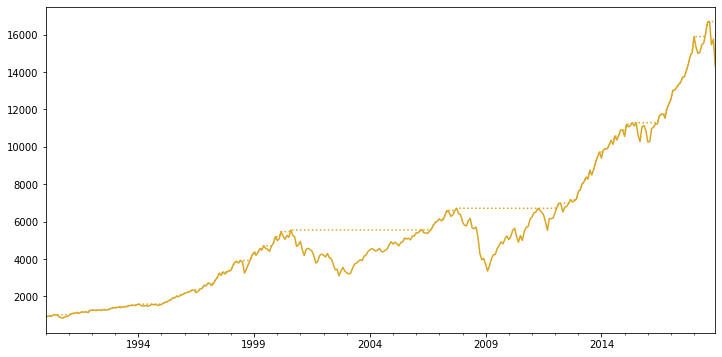

In [48]:
rets_tmi =  erk.get_total_market_index_returns()["1990":]
dd_tmi = erk.drawdown(rets_tmi)
ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls="-", color="goldenrod")
dd_tmi["Previous Peak"].plot(ax=ax, ls=":", color="goldenrod")

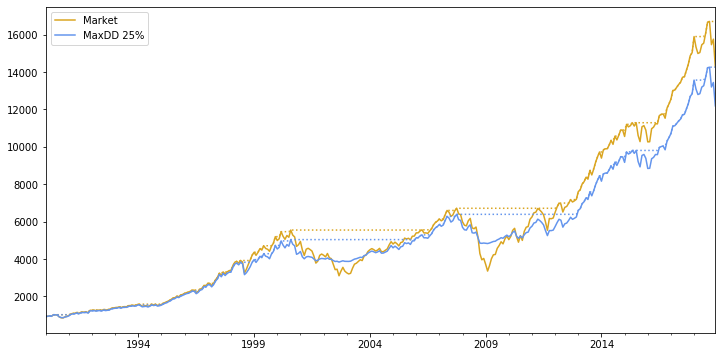

In [49]:
cashrate = 0.03
monthly_cashreturn = (1+cashrate)**(1/12) - 1
rets_cash = pd.DataFrame(data= monthly_cashreturn, index=rets_tmi.index, columns=[0]) # 1 column dataframe
rets_maxdd25 = erk.bt_mix(pd.DataFrame(rets_tmi), rets_cash, allocator=erk.drawdown_allocator, maxdd=.25, m=5)
dd_25 = erk.drawdown(rets_maxdd25[0])

ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls="-", color="goldenrod", label="Market", legend=True)
dd_tmi["Previous Peak"].plot(ax=ax, ls=":", color="goldenrod")
dd_25["Wealth"].plot(ax=ax, label="MaxDD 25%", color="cornflowerblue", legend=True)
dd_25["Previous Peak"].plot(ax=ax, color="cornflowerblue", ls=":")

In [50]:
erk.summary_stats(pd.concat([rets_tmi.rename("Market"), rets_maxdd25[0].rename("MaxDD")], axis=1))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Market,0.096058,0.145419,-0.668827,4.247282,0.066949,0.094633,0.441951,-0.499943
MaxDD,0.090062,0.112755,-0.630463,5.015334,0.049978,0.071074,0.518327,-0.244212


In [ ]:
s